# Homework set 3

(Due Mar 3., 2023 at Noon)

Submit your solution notebook in your directory via github PR.

## Problem 1 (100 pts)

Our Colloquium speaker a couple of weeks ago, Ashley Villar, has had to use MCMC extensively. She had something like 5,243 objects from Pan-STARRS to analyze after all (https://zenodo.org/record/3974950)

You'll only have to deal with two - the two that are in this directory

In [2]:
!ls *snana.dat

PS1_PS1MD_PSc000098.snana.dat  PS1_PS1MD_PSc000174.snana.dat


She used equation 1, defined here: https://arxiv.org/abs/1905.07422

# $ F= \begin{cases}\frac{A+\beta\left(t-t_0\right)}{1+e^{-\left(t-t_0\right) / \tau_{\text {rise }}}} & t<t_1 \\ \frac{\left(A+\beta\left(t_1-t_0\right)\right) e^{-\left(t-t_1\right) / \tau_{\text {fall }}}}{1+e^{-\left(t-t_0\right) / \tau_{\text {rise }}}} & t \geq t_1\end{cases} $

to model the *flux*, $F$, of a supernova in some band, at times, $t$.

You can see the fits Ashley derived here:

<img src="examples.jpg">

As Bayesian's we have 4 questions to answer

    What's the model?
    What's the Likelihood?
    What's the Prior?
    How do you sample?

I've tell you 1 (eqn. 1 in Villar). and you've already guessed 4 (use `emcee`: https://emcee.readthedocs.io/en/stable/). 

Write some functions to implement the model, likelihood and priors, and use `emcee` to sample the posterior with 20 walkers and however many steps you feel is necessary for the burn-in and chain. (50 pts - 15 each for the model, likelihood, priors and 5 to sample) 
 
Show that the posterior is reasonable by generating a corner plot with the `corner` package. (10 pts)

Get the median estimate for each parameter, and recreate the plot above from Ashley. Note that she's made 5 random draws from the chain for each passband to give the reader a sense for the uncertainties. (25 pts)

Report the auto-correlation length of your chain. Thin it by a factor of 10 and report the auto-correlation length again. (15 pts)

In [17]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import astropy
import matplotlib.pyplot as plt
import emcee
import corner
from scipy import optimize
from scipy.stats import uniform

In [18]:
## Write some functions to implement the model, likelihood and priors, and use emcee to sample the posterior with 20 walkers 
## and however many steps you feel is necessary for the burn-in and chain. 

## Function for model

def villar_model(A,beta,t_0,gamma,t_rise,t_fall,c,t): ## From Villar et al. (2019), eq'n 1
    flux = np.where(t<(gamma+t_0),(A+beta*(t-t_0))/(1+np.exp(-(t-t_0)/t_rise)), 
                    (A+beta*(gamma))*np.exp(-(t-gamma-t_0)/t_fall)/(1+np.exp(-(t-t_0)/t_rise)))
    return flux

#def N(int1,int2):
   # return: 
    
def priors(prior_size):
    
    ## All priors are a uniform distribution - From Villar et al. (2019), table 1
    
    A = uniform.rvs(scale=(3*sigma,100*Fmax),size=prior_size) ## Amplitude 
    beta = uniform.rvs(scale=(-Fmax/150,0),size=prior_size) ## Plateau slope
    t_0 = uniform.rvs(scale=(tmin-50,tmax+300),size=prior_size) ## Start time
    gamma = uniform.rvs(scale=((2/3)*N(5,5)+(1/3)*N(60,30)),size=prior_size) ## Plateau duration, t_1-t_0
    t_rise = uniform.rvs(scale=(0.01,50),size=prior_size) ## Rise time
    t_fall = uniform.rvs(scale=(1,300),size=prior_size) ## Decline time
    c = uniform.rvs(scale=(-3*sigma,3*sigma),size=prior_size) ## Baseline flux
    
    return A,beta,t_0,gamma,t_rise,t_fall,c ## input to model

def log_likelihood():
    return 
# tmin,tmax,Fmax,sigma,N - nums to define

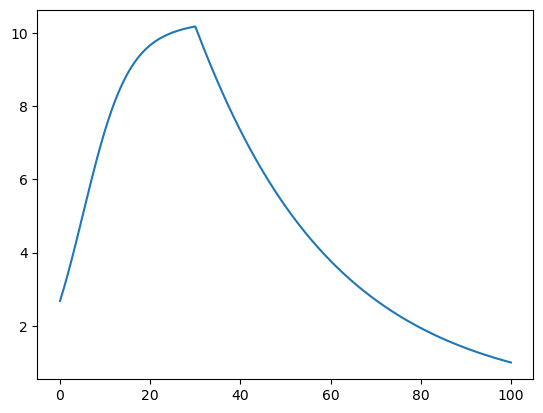

In [15]:
plt.plot(np.linspace(0,100,1000),villar_model(10,0.01,5,25,5,30,10,np.linspace(0,100,1000)))

In [21]:
sigma=1
Fmin=1
Fmax=100
priors(10)

ValueError: size does not match the broadcast shape of the parameters. 10, (10,), (2,)